In [34]:
import ZMX
from raytrace import raytrace, coords, lprint
import numpy as np
import ceo
import matplotlib.pyplot as plt
%matplotlib inline

[0.0, 1.0]
{'origin': [0.0, 0.0, 0.0], 'material': '', 'euler_angles': [0.0, 0.0, 0.0]}
[0.0, 1.0]
{'origin': [0.0, 0.0, 0.0], 'material': '', 'euler_angles': [0.0, 0.0, 0.0]}
[10.0, 1.3]
{'origin': [0.0, 0.0, 0.1], 'material': 'BK7', 'euler_angles': [0.0, 0.0, 0.0]}
in PARM with type  SZERNSAG
do_standardzernikesag
0.015 0.0 0.0 [1e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[-10.0, 1.0]
{'origin': [0.0, 0.0, 0.01], 'material': '', 'zernike_a': array([1.e-05, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00]), 'euler_angles': [0.0, 0.0, 0.0]}
[0.0, 1.0]
{'origin': [0.0, 0.0, 0.095], 'material': '', 'euler_angles': [0.0, 0.0, 0.0]}
PROPAGATION:

Material refractive index: 1
x: 0.0                  y: 0.0                  z: 0.0                 
k: 0.0                  l: 0.0                  m: 1.0                 

BK7
Material refractive index: 1.51852238762
x: 0.0                  y: 0.0                  z: 0.1                 
k: 0.0              

[0.0, 1.0]
{'origin': [0.0, 0.0, 0.0], 'material': '', 'euler_angles': [0.0, 0.0, 0.0]}
[0.0, 1.0]
{'origin': [0.0, 0.0, 0.0], 'material': '', 'euler_angles': [0.0, 0.0, 0.0]}
[10.0, 1.3]
{'origin': [0.0, 0.0, 0.1], 'material': 'BK7', 'euler_angles': [0.0, 0.0, 0.0]}
in PARM with type  SZERNSAG
do_standardzernikesag
0.015 0.0 0.0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1e-05, 0.0, 0.0]
[-10.0, 1.0]
{'origin': [0.0, 0.0, 0.01], 'material': '', 'zernike_a': array([0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e-05,
       0.e+00, 0.e+00]), 'euler_angles': [0.0, 0.0, 0.0]}
[0.0, 1.0]
{'origin': [0.0, 0.0, 0.095], 'material': '', 'euler_angles': [0.0, 0.0, 0.0]}
PROPAGATION:

Material refractive index: 1
x: 0.0                  y: 0.0                  z: 0.0                 
k: 0.0                  l: 0.0                  m: 1.0                 

BK7
Material refractive index: 1.51852238762
x: 0.0                  y: 0.0                  z: 0.1                 
k: 0.0              

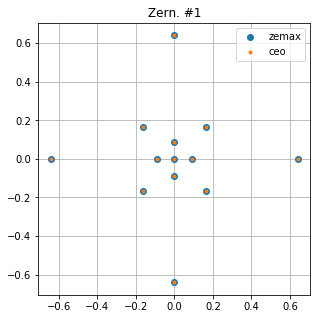

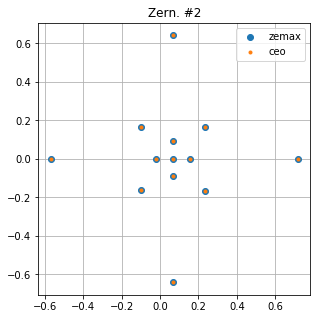

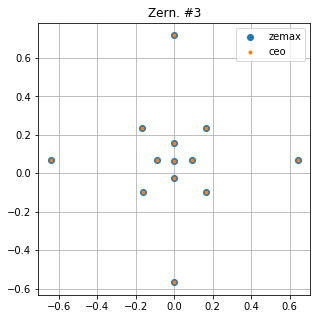

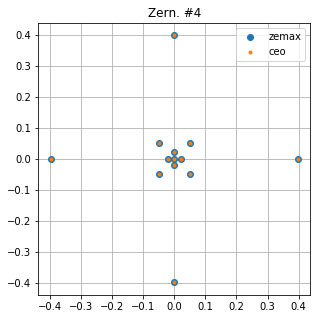

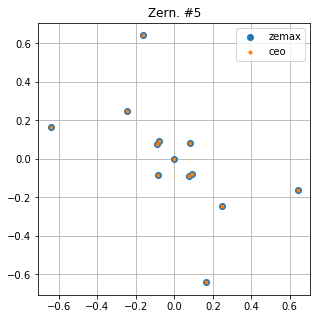

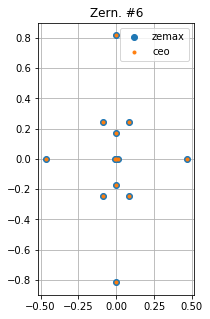

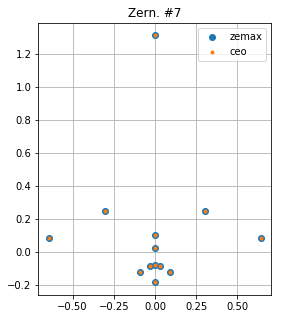

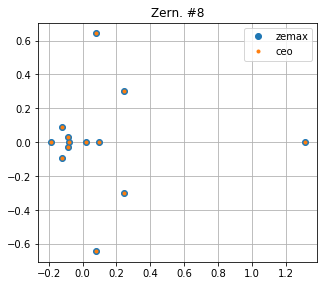

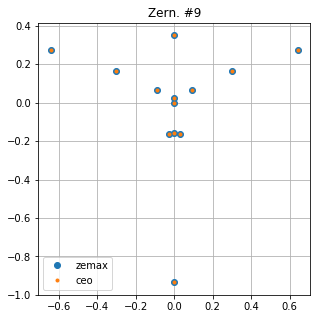

In [64]:
D = np.double(30e-3)
A = ceo.Aperture(D,0,nPx)
nPx = 5
for j in range(1,10):
    
    zemax_case = 'conic1_zern_z{}'.format(j)

    rayfiles = np.load('ZmxFiles/{}.npz'.format(zemax_case))
    raydata = rayfiles['raydata']

    src  = ceo.Source("V",rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,0.09])
    xyz = [src.rays.coordinates.host()]
    klm = [src.rays.directions.host()]

    ZmxModel = ZMX.ZemaxModel("ZmxFiles/{}.zmx".format(zemax_case), src)

    S          = ZmxModel.surfaces[1:]
    GlassIndex = ZmxModel.GlassIndex
    [ZMX.update_material(s, GlassIndex) for s in S]

    A.vignetting(src)
    v = src.rays.vignetting.host().ravel()==1

    print("PROPAGATION:")
    [raytrace(src,S,k+1,xyz,klm) for k in range(len(S))]

    fig,ax = plt.subplots()
    fig.set_size_inches(5,5)
    ax.plot(1e3*raydata[4,0,1,:,2],
            1e3*raydata[4,0,1,:,3],'o',label='zemax')
    ax.plot(1e3*xyz[4][v,0],1e3*xyz[4][v,1],'.',label='ceo')
    ax.grid()
    ax.set_aspect('equal')
    ax.set_title("Zern. #{}".format(j))
    ax.legend()
